<a href="https://colab.research.google.com/github/PondKann/CXR-Project/blob/main/TransferL_KaggleDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Load data

In [66]:
train_dir = '/content/drive/My Drive/Senior Project/xray_dataset_covid19/train'
validation_dir = '/content/drive/My Drive/Senior Project/xray_dataset_covid19/test'

In [69]:
data_gen_train = ImageDataGenerator(rescale=1/255.)
data_gen_valid = ImageDataGenerator(rescale=1/255.)

In [68]:
train_generator = data_gen_train.flow_from_directory(train_dir, target_size=(128,128), batch_size=128, class_mode= "binary" )
valid_generator = data_gen_valid.flow_from_directory(validation_dir, target_size=(128,128), batch_size=128, class_mode= "binary" )

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [71]:
train_normal_dir = os.path.join(train_dir,'NORMAL')
train_pneumonia_dir = os.path.join(train_dir,'PNEUMONIA')
validation_normal_dir = os.path.join(validation_dir,'NORMAL')
validation_pneumonia_dir = os.path.join(validation_dir,'PNEUMONIA')

In [72]:
print('total training normal-rays :', len(os.listdir(train_normal_dir)))   # เช็คว่าใน train_normal_dir มีกี่ภาพ
print('total training Pneumonia x-rays:', len(os.listdir(train_pneumonia_dir)))
print('total validation normal-rays :', len(os.listdir(validation_normal_dir)))
print('total validation Pneumonia x-rays:', len(os.listdir(validation_pneumonia_dir)))

total training normal-rays : 74
total training Pneumonia x-rays: 74
total validation normal-rays : 20
total validation Pneumonia x-rays: 20


In [64]:
list = os.listdir(train_normal_dir) # train_normal_dir is  directory path
number_files = len(list)
print(number_files)

74


#### Show image

In [9]:
os.listdir(train_normal_dir)[:4]

['IM-0006-0001.jpeg',
 'IM-0003-0001.jpeg',
 'IM-0001-0001.jpeg',
 'IM-0005-0001.jpeg']

In [10]:
img = cv2.imread(os.path.join(train_normal_dir, 'IM-0006-0001.jpeg' ))

In [11]:
img.shape

(1326, 1663, 3)

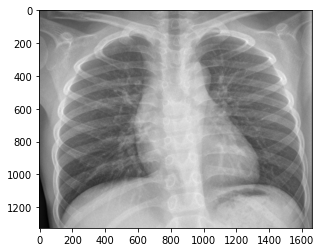

In [18]:
plt.imshow(img)

In [15]:
# NumPy.'img' = A single image.
flip_1 = np.fliplr(img)

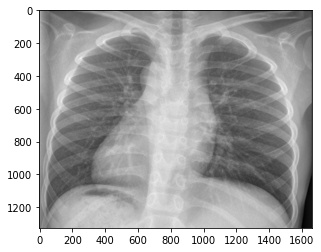

In [17]:
plt.imshow(flip_1)

In [ ]:
!pip install tensorflow

In [31]:
!pip install keras

In [26]:
import tensorflow.compat.v1 as tf

https://www.analyticsvidhya.com/blog/2019/12/image-augmentation-deep-learning-pytorch/

In [ ]:
# loading dataset
data = pd.read_csv('emergency_vs_non-emergency_dataset/emergency_train.csv')
data.head()

#### test2

In [130]:
test2_dir = '/content/drive/My Drive/Senior Project/xray_dataset_covid19/test2'
test2_normal_dir = os.path.join(test2_dir,'NORMAL')
test2_pneumonia_dir = os.path.join(test2_dir,'PNEUMONIA')

In [111]:
nor2 = []
for i in range(len(os.listdir(test2_normal_dir))):
    img = os.listdir(test2_normal_dir)[i]
    nor2.append(img)
tableNor = pd.DataFrame({'ImageName':[nor2][0],
                                       'Type': 'Normal'   })
tableNor

,ImageName,Type
0,NORMAL2-IM-0059-0001.jpeg,Normal
1,NORMAL2-IM-0171-0001.jpeg,Normal
2,NORMAL2-IM-0132-0001.jpeg,Normal
3,NORMAL2-IM-0117-0001.jpeg,Normal
4,NORMAL2-IM-0123-0001.jpeg,Normal


In [114]:
Pneuno2 = []
for i in range(len(os.listdir(test2_pneumonia_dir))):
    img = os.listdir(test2_pneumonia_dir)[i]
    Pneuno2.append(img)
tablePneuno = pd.DataFrame({'ImageName':[peno2][0],
                                             'Type': 'Pneunomia'     })
tablePneuno

,ImageName,Type
0,streptococcus-pneumoniae-pneumonia-temporal-ev...,Pneunomia
1,SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day...,Pneunomia
2,SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9...,Pneunomia
3,SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10...,Pneunomia
4,ryct.2020200034.fig5-day7.jpeg,Pneunomia


In [116]:
data_test2 = pd.concat([tableNor, tablePneuno])
data_test2

,ImageName,Type
0,NORMAL2-IM-0059-0001.jpeg,Normal
1,NORMAL2-IM-0171-0001.jpeg,Normal
2,NORMAL2-IM-0132-0001.jpeg,Normal
3,NORMAL2-IM-0117-0001.jpeg,Normal
4,NORMAL2-IM-0123-0001.jpeg,Normal
0,streptococcus-pneumoniae-pneumonia-temporal-ev...,Pneunomia
1,SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day...,Pneunomia
2,SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9...,Pneunomia
3,SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10...,Pneunomia
4,ryct.2020200034.fig5-day7.jpeg,Pneunomia


In [129]:
for i in data_test2.iloc[:,0]:
    print(i)

NORMAL2-IM-0059-0001.jpeg
NORMAL2-IM-0171-0001.jpeg
NORMAL2-IM-0132-0001.jpeg
NORMAL2-IM-0117-0001.jpeg
NORMAL2-IM-0123-0001.jpeg
streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day3.jpg
SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day19.jpeg
SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9.jpeg
SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10.jpeg
ryct.2020200034.fig5-day7.jpeg


## Transfer Learning + Fine Tune

### MobileNetV2
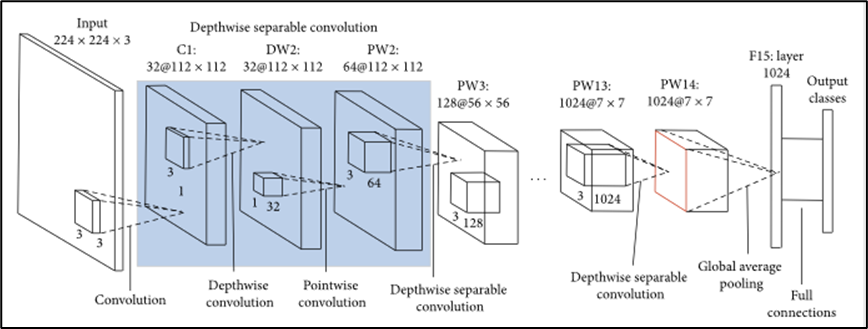

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(128,128,3), include_top=False, weights="imagenet")

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][

In [ ]:
base_model.trainable=False   #ล็อก W 

Add custom head

In [ ]:
average_pooling_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
prediction_layer = tf.keras.layers.Dense(units=1, activation="sigmoid")(average_pooling_layer)

In [ ]:
model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][0]']           

Train model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=2,
    mode="max"
)
#จะหยุดเทรนเมื่อ val loss ไม่เพิ่มขึ้นขึ้น 2 รอบ

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=2,
    mode="max"
)

In [ ]:
model.fit_generator(train_generator, epochs=7, validation_data=valid_generator, callbacks=[callback])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/7
2/2 [==============================] - 53s 44s/step - loss: 0.7623 - accuracy: 0.4865 - val_loss: 0.6715 - val_accuracy: 0.6000
Epoch 2/7
2/2 [==============================] - 8s 7s/step - loss: 0.7206 - accuracy: 0.5405 - val_loss: 0.6475 - val_accuracy: 0.6750
Epoch 3/7
2/2 [==============================] - 8s 7s/step - loss: 0.6977 - accuracy: 0.5743 - val_loss: 0.6258 - val_accuracy: 0.6750
Epoch 4/7
2/2 [==============================] - 8s 2s/step - loss: 0.6849 - accuracy: 0.5811 - val_loss: 0.6077 - val_accuracy: 0.6750


Fine tuning

In [ ]:
len(base_model.layers)

154

In [ ]:
base_model.trainable = True

In [ ]:
for layer in base_model.layers[:100]:    #fix w & bias in layer 0-100 
    layer.trainable = False

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),
              loss="binary_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.fit_generator(train_generator, epochs=10, 
                    validation_data=valid_generator,
                    callbacks=[callback])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
2/2 [==============================] - 16s 9s/step - loss: 0.4354 - accuracy: 0.7838 - val_loss: 0.2824 - val_accuracy: 0.9500
Epoch 2/10
2/2 [==============================] - 9s 8s/step - loss: 0.0814 - accuracy: 0.9865 - val_loss: 0.2734 - val_accuracy: 0.9000
Epoch 3/10
2/2 [==============================] - 9s 2s/step - loss: 0.0408 - accuracy: 1.0000 - val_loss: 0.2325 - val_accuracy: 0.9000


### DenseNet201
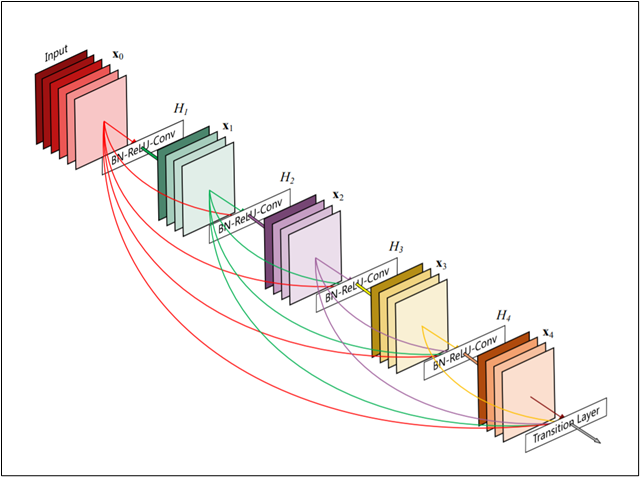

In [ ]:
base_model2 = tf.keras.applications.DenseNet201(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

74850304/74836368 [==============================] - 1s 0us/step


In [ ]:
base_model2.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

In [ ]:
base_model2.trainable=False

Add custom head

In [ ]:
average_pooling_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model2.output)
prediction_layer = tf.keras.layers.Dense(units=1, activation="sigmoid")(average_pooling_layer)

In [ ]:
model2 = tf.keras.models.Model(inputs=base_model2.input, outputs=prediction_layer)

In [ ]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

Train model

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
callback2 = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=2,
    mode="max")

In [ ]:
model2.fit_generator(train_generator, epochs=10, 
                    validation_data=valid_generator,
                    callbacks=[callback2])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
2/2 [==============================] - 57s 34s/step - loss: 0.7188 - accuracy: 0.5270 - val_loss: 0.6926 - val_accuracy: 0.5500
Epoch 2/10
2/2 [==============================] - 19s 5s/step - loss: 0.6949 - accuracy: 0.5338 - val_loss: 0.6688 - val_accuracy: 0.5750
Epoch 3/10
2/2 [==============================] - 18s 15s/step - loss: 0.6684 - accuracy: 0.5811 - val_loss: 0.6469 - val_accuracy: 0.6750
Epoch 4/10
2/2 [==============================] - 18s 5s/step - loss: 0.6536 - accuracy: 0.6081 - val_loss: 0.6285 - val_accuracy: 0.6750
Epoch 5/10
2/2 [==============================] - 19s 5s/step - loss: 0.6354 - accuracy: 0.6149 - val_loss: 0.6141 - val_accuracy: 0.6750


Fine tuning

In [ ]:
len(base_model2.layers)

707

In [ ]:
base_model2.trainable = True

In [ ]:
for layer in base_model2.layers[:500]:    #fix w & bias in layer 0-500
    layer.trainable = False

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),
              loss="binary_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model2.fit_generator(train_generator, epochs=10, 
                    validation_data=valid_generator,
                    callbacks=[callback2])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
2/2 [==============================] - 51s 23s/step - loss: 0.3981 - accuracy: 0.7905 - val_loss: 0.1285 - val_accuracy: 0.9500
Epoch 2/10
2/2 [==============================] - 23s 6s/step - loss: 0.0545 - accuracy: 1.0000 - val_loss: 0.1071 - val_accuracy: 0.9500
Epoch 3/10
2/2 [==============================] - 23s 6s/step - loss: 0.0255 - accuracy: 1.0000 - val_loss: 0.0971 - val_accuracy: 0.9750
Epoch 4/10
2/2 [==============================] - 24s 6s/step - loss: 0.0228 - accuracy: 1.0000 - val_loss: 0.0813 - val_accuracy: 0.9750
Epoch 5/10
2/2 [==============================] - 23s 5s/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 0.0750 - val_accuracy: 0.9750


In [ ]:
model2.evaluate_generator(
    train_generator,
    verbose=1,
    steps=None,
    callbacks=callback2,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


2/2 [==============================] - 15s 1s/step - loss: 0.0958 - accuracy: 0.9730


[0.09581692516803741, 0.9729729890823364]

In [ ]:
model2.predict(train_generator)

In [ ]:
pp = model2.predict(
    train_generator,
    verbose=0,
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)

In [ ]:
len(pp)

148

In [ ]:
test2_dir = '/content/drive/My Drive/Senior Project/xray_dataset_covid19/test2'

In [ ]:
data_gen_test2 = ImageDataGenerator(rescale=1/255.)

In [ ]:
test2_generator = data_gen_test2.flow_from_directory(test2_dir, target_size=(128,128), batch_size=128, class_mode= "binary" )

Found 10 images belonging to 2 classes.


In [ ]:
model2.predict(test2_generator)

array([[1.1755288e-02],
       [5.8598816e-01],
       [5.4666251e-02],
       [1.6513467e-04],
       [9.9644792e-01],
       [9.5102566e-01],
       [9.9251676e-01],
       [1.6100532e-01],
       [9.9260342e-01],
       [1.4482796e-02]], dtype=float32)

In [ ]:
model2.predict_classes(test2_generator)

AttributeError: ignored

In [ ]:
import random

In [ ]:
random.seed(42)

In [ ]:
random.seed()

<module 'random' from '/usr/lib/python3.7/random.py'>

## Rotaion

In [ ]:
os.listdir(train_normal_dir)[:4]

['IM-0006-0001.jpeg',
 'IM-0003-0001.jpeg',
 'IM-0001-0001.jpeg',
 'IM-0005-0001.jpeg']

In [ ]:
img = cv2.imread(os.path.join(train_normal_dir, 'IM-0006-0001.jpeg' ))

In [ ]:
plt.imshow(img)

In [ ]:
# import the Python Image processing Library
from PIL import Image

In [ ]:
# Create an Image object from an Image
colorImage  = Image.open('/content/drive/My Drive/Senior Project/xray_dataset_covid19/train/NORMAL/IM-0006-0001.jpeg')

In [ ]:
colorImage.save('colorImage.jpg')

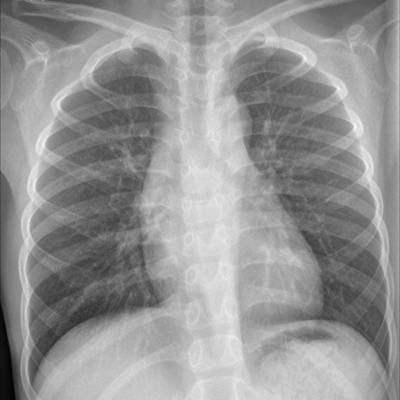

In [ ]:
# Display the Original Image
colorImage.resize((400, 400))

In [ ]:
# Rotate it by 45 degrees
rotated  = colorImage.rotate(15)

In [ ]:
rotated.save('rotated.jpg')

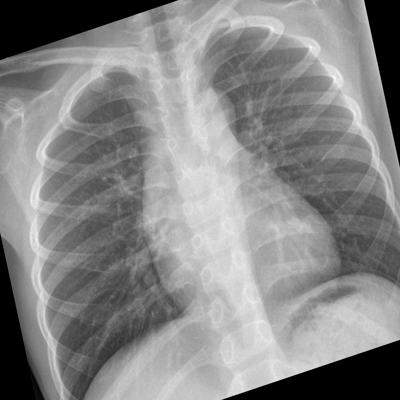

In [ ]:
rotated.resize((400, 400))

In [ ]:
# Rotate it by 90 degrees
transposed  = colorImage.transpose(Image.ROTATE_90)

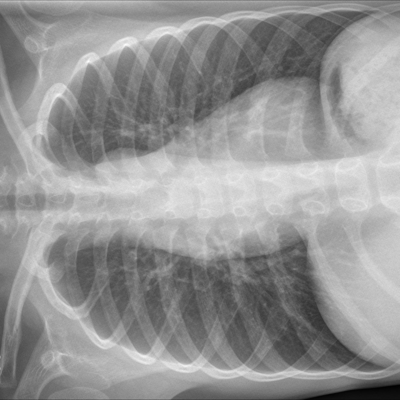

In [ ]:
# Display the Image rotated by 90 degrees
transposed.resize((400, 400))

In [ ]:
# create figure
fig = plt.figure(figsize=(20, 20))

<Figure size 1440x1440 with 0 Axes>

In [ ]:
# setting values to rows and column variables
rows = 2
columns = 2

In [ ]:
Image1 = cv2.imread('colorImage.jpg')
Image2 = cv2.imread('rotated.jpg')

In [ ]:
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1.0, 'Original')

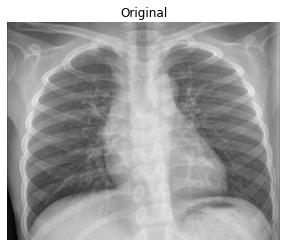

In [ ]:
# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("Original")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1.0, 'Rotation15')

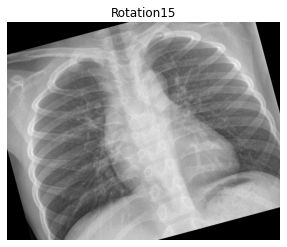

In [ ]:
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("Rotation15")
  

In [ ]:
fig

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 1.0, 'Fourth')

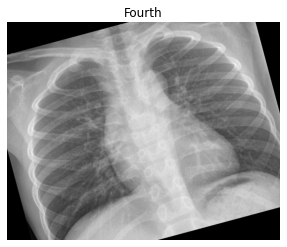

In [ ]:
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("Original")


# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("Rotation15")
  

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("Third")
  
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("Fourth")